<a href="https://colab.research.google.com/github/yc-chen10/113-1-finance/blob/main/week9%E4%BD%9C%E6%A5%AD_%E6%99%82%E9%96%93%E5%BA%8F%E5%88%97_LSTM%E3%80%81Transformer_%E9%A1%9E%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

####抓股票資料（4年）

In [2]:
# "一詮"股票代號
stock_id = '2486'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
# date = yyyymmdd

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240923&stockNo=2486
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20241112


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/11/01,"17,157,164","2,185,284,345",124.00,130.00,122.00,130.00,+4.50,"9,840"
1,113/11/04,"15,117,268","1,940,280,697",129.00,130.50,126.50,127.00,-3.00,"8,012"
2,113/11/05,"17,571,795","2,263,681,296",127.00,132.50,126.00,127.50,+0.50,"9,858"
3,113/11/06,"15,581,733","1,972,558,933",128.00,129.50,124.50,126.00,-1.50,"9,213"
4,113/11/07,"14,530,182","1,856,245,913",128.50,130.00,126.00,126.00,0.00,"8,245"
5,113/11/08,"13,921,510","1,774,966,396",128.50,130.00,125.50,126.50,+0.50,"7,944"
6,113/11/11,"27,778,630","3,376,455,820",127.00,129.00,117.50,119.00,-7.50,"15,937"
7,113/11/12,"12,877,057","1,517,917,913",117.50,120.00,115.00,119.50,+0.50,"7,519"


In [3]:
def get_stock_data(stock_no, year, month):
    # 將日期格式化為 'yyyymmdd'，並指定為該月份的第一天
    date = f"{year}{str(month).zfill(2)}01"
    url = f"https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}"

    # 發送HTTP請求並獲取響應
    response = requests.get(url)
    if response.status_code == 200:
        # 將結果轉換為JSON
        data = response.json()
        if data['stat'] == 'OK':
            # 返回數據中的每日交易資料
            return pd.DataFrame(data['data'], columns=data['fields'])
        else:
            print(f"No data for {year}-{month}")
            return None
    else:
        print(f"Failed to fetch data for {year}-{month}")
        return None


In [4]:
def get_multiple_months(stock_no, start_year, start_month, end_year, end_month):
    all_data = []

    # 循環通過年份和月份來調用API
    current_year = start_year
    current_month = start_month

    while (current_year < end_year) or (current_year == end_year and current_month <= end_month):
        # 獲取單月的股票資料
        monthly_data = get_stock_data(stock_no, current_year, current_month)
        if monthly_data is not None:
            all_data.append(monthly_data)

        # 更新到下一個月份
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1

    # 合併所有月份的數據
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return None


In [5]:
stock_no = '2486'
start_year = 2021
start_month = 9
end_year = 2024
end_month = 9

stock_data = get_multiple_months(stock_no, start_year, start_month, end_year, end_month)

# 打印股票資料
if stock_data is not None:
    print(stock_data)


            日期        成交股數           成交金額     開盤價     最高價    最低價     收盤價  \
0    110/09/01  22,328,010  1,171,695,669   50.20   53.90  50.20   53.00   
1    110/09/02  35,639,973  1,935,066,472   52.80   55.50  52.50   54.70   
2    110/09/03  18,766,743  1,013,755,989   54.50   55.50  53.10   54.50   
3    110/09/06  18,137,809    989,826,334   54.10   55.90  53.30   53.50   
4    110/09/07  18,660,351    941,627,386   53.20   53.60  48.75   50.00   
..         ...         ...            ...     ...     ...    ...     ...   
744  113/09/24   8,628,849    821,923,069   94.20   97.30  93.30   94.60   
745  113/09/25   6,529,733    622,251,538   95.60   96.30  94.60   94.90   
746  113/09/26  29,060,361  2,930,693,598   95.80  103.50  95.10  100.50   
747  113/09/27  29,915,593  3,070,955,106  101.00  106.00  99.90  100.00   
748  113/09/30  14,403,514  1,465,344,231   99.30  104.00  99.00  100.00   

      漲跌價差    成交筆數  
0    +3.10  12,629  
1    +1.70  19,985  
2    -0.20  10,762  
3  

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      749 non-null    object
 1   成交股數    749 non-null    object
 2   成交金額    749 non-null    object
 3   開盤價     749 non-null    object
 4   最高價     749 non-null    object
 5   最低價     749 non-null    object
 6   收盤價     749 non-null    object
 7   漲跌價差    749 non-null    object
 8   成交筆數    749 non-null    object
dtypes: object(9)
memory usage: 52.8+ KB


#### 時間格式轉換def

In [7]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
stock_data['日期'] = stock_data['日期'].apply(convert_minguo_to_ad)

In [8]:
# 轉換為 pandas 中的 datetime 格式
stock_data['日期'] = pd.to_datetime(stock_data['日期'], format='%Y/%m/%d')

In [9]:
stock_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-09-01,"22,328,010","1,171,695,669",50.20,53.90,50.20,53.00,+3.10,"12,629"
1,2021-09-02,"35,639,973","1,935,066,472",52.80,55.50,52.50,54.70,+1.70,"19,985"
2,2021-09-03,"18,766,743","1,013,755,989",54.50,55.50,53.10,54.50,-0.20,"10,762"
3,2021-09-06,"18,137,809","989,826,334",54.10,55.90,53.30,53.50,-1.00,"10,030"
4,2021-09-07,"18,660,351","941,627,386",53.20,53.60,48.75,50.00,-3.50,"10,851"


#### 轉數字 numeric

In [10]:
#確保stock_data 轉成數字
stock_data['收盤價'] = stock_data['收盤價'].apply(pd.to_numeric, errors='coerce')
stock_data['開盤價'] = stock_data['開盤價'].apply(pd.to_numeric, errors='coerce')
stock_data['最高價'] = stock_data['最高價'].apply(pd.to_numeric, errors='coerce')
stock_data['最低價'] = stock_data['最低價'].apply(pd.to_numeric, errors='coerce')

In [11]:
stock_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-09-01,"22,328,010","1,171,695,669",50.2,53.9,50.20,53.0,+3.10,"12,629"
1,2021-09-02,"35,639,973","1,935,066,472",52.8,55.5,52.50,54.7,+1.70,"19,985"
2,2021-09-03,"18,766,743","1,013,755,989",54.5,55.5,53.10,54.5,-0.20,"10,762"
3,2021-09-06,"18,137,809","989,826,334",54.1,55.9,53.30,53.5,-1.00,"10,030"
4,2021-09-07,"18,660,351","941,627,386",53.2,53.6,48.75,50.0,-3.50,"10,851"


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      749 non-null    datetime64[ns]
 1   成交股數    749 non-null    object        
 2   成交金額    749 non-null    object        
 3   開盤價     749 non-null    float64       
 4   最高價     749 non-null    float64       
 5   最低價     749 non-null    float64       
 6   收盤價     749 non-null    float64       
 7   漲跌價差    749 non-null    object        
 8   成交筆數    749 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 52.8+ KB


#### LSTM

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0131
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0014
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.8250e-04
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.5517e-04
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.4579e-04
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.9645e-04
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.6415e-04
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.4484e-04
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.8982e-04
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.9132e-04


1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


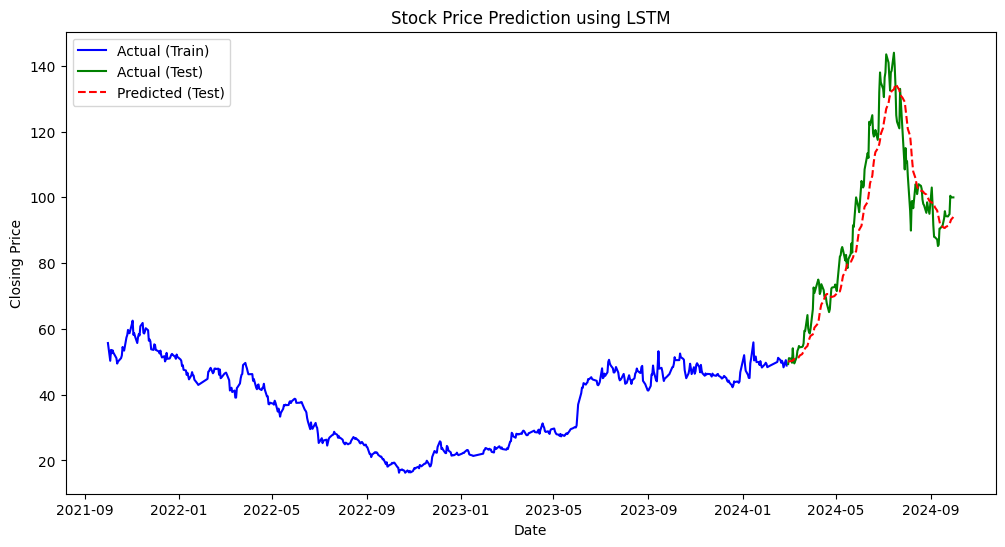

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 載入資料
df = stock_data.copy()

# 選擇收盤價
closing_prices = df['收盤價'].values.reshape(-1, 1)

# 正規化資料
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# 定義窗口大小
window_size = 20

# 創建輸入特徵和標籤
X, y = [], []
for i in range(window_size, len(closing_prices_scaled)):
    X.append(closing_prices_scaled[i-window_size:i, 0])
    y.append(closing_prices_scaled[i, 0])
X, y = np.array(X), np.array(y)

# 調整 X 資料的維度
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 將資料切分為訓練集和測試集
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 建立 LSTM 模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 預測0.2比例的資料
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# 還原標籤的縮放
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 可視化
plt.figure(figsize=(12, 6))

# 標籤線：訓練和測試資料
plt.plot(df['日期'][window_size:split_index + window_size], y_train_actual, color='blue', label='Actual (Train)')
plt.plot(df['日期'][split_index + window_size:], y_test_actual, color='green', label='Actual (Test)')

# 預測線：僅包含測試資料的預測
plt.plot(df['日期'][split_index + window_size:], predictions, color='red', linestyle='dashed', label='Predicted (Test)')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()

#### 使用 Transformer 模型預測股價漲跌

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers


# 定義 Transformer 編碼器層
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0, epsilon=1e-6, attention_axes=None, kernel_size=1):
    x = layers.LayerNormalization(epsilon=epsilon)(inputs)  # 正規化層
    x = layers.MultiHeadAttention(
        key_dim=head_size,
        num_heads=num_heads,
        dropout=dropout,
        attention_axes=attention_axes
    )(x, x)  # 自注意力機制
    x = layers.Dropout(dropout)(x)  # Dropout
    res = x + inputs  # 殘差連接

    x = layers.LayerNormalization(epsilon=epsilon)(res)  # 第二層正規化
    x = layers.Conv1D(filters=ff_dim, kernel_size=kernel_size, activation='relu')(x)  # 前饋層
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=kernel_size)(x)  # 第二層卷積
    return x + res  # 殘差連接

# 定義 Transformer 模型
def build_transformer_model(window_size, head_size, num_heads, ff_dim, num_trans_blocks, mlp_units, dropout=0, mlp_dropout=0, epsilon=1e-6, kernel_size=1):
    inputs = tf.keras.Input(shape=(window_size, 1), name='Input')  # 輸入層，大小為 (window_size, 1)
    x = inputs

    # 產生多層 Transformer 編碼器
    for _ in range(num_trans_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout, epsilon, kernel_size=kernel_size)

    # 全局平均池化層
    x = layers.GlobalAveragePooling1D()(x)

    # MLP 層
    for dim in mlp_units:
        x = layers.Dense(dim, activation='relu')(x)
        x = layers.Dropout(mlp_dropout)(x)

    # 輸出層，預測單一的股價（明日收盤價）
    outputs = layers.Dense(1)(x)
    return tf.keras.Model(inputs, outputs, name='transformer_stock_price_prediction')




In [34]:
# 加載數據
df = stock_data.copy()
closing_prices = df['收盤價'].values.reshape(-1, 1)

# 數據標準化
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# 設定窗口大小
window_size = 20

# 創建訓練數據
X, y = [], []
for i in range(window_size, len(closing_prices_scaled) - 1):
    X.append(closing_prices_scaled[i - window_size:i, 0])  # 使用前 window_size 天作為特徵
    y.append(closing_prices_scaled[i, 0])  # 預測明天的收盤價

X, y = np.array(X), np.array(y)

# 調整數據形狀
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 切分訓練集和測試集（20% 為測試集）
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 設置模型參數
head_size = 64
num_heads = 4
ff_dim = 128
num_trans_blocks = 2
mlp_units = [64]
dropout = 0.2
mlp_dropout = 0.2
kernel_size = 1

# 創建 Transformer 模型
model = build_transformer_model(
    window_size=window_size,
    head_size=head_size,
    num_heads=num_heads,
    ff_dim=ff_dim,
    num_trans_blocks=num_trans_blocks,
    mlp_units=mlp_units,
    dropout=dropout,
    mlp_dropout=mlp_dropout,
    kernel_size=kernel_size
)

# 編譯模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# 設定 EarlyStopping 以防止過擬合
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 訓練模型
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# 預測
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # 還原標準化

# 還原標籤的縮放
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0182 - val_loss: 0.1310
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0069 - val_loss: 0.1151
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0049 - val_loss: 0.1011
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0038 - val_loss: 0.0703
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0016 - val_loss: 0.0483
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0012 - val_loss: 0.0442
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0013 - val_loss: 0.0446
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0012 - val_loss: 0.0457
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0011 - val_loss: 0.0450
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0012 - val_loss: 0.0403
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 9.8307e-04 - val_loss: 0.0432
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms

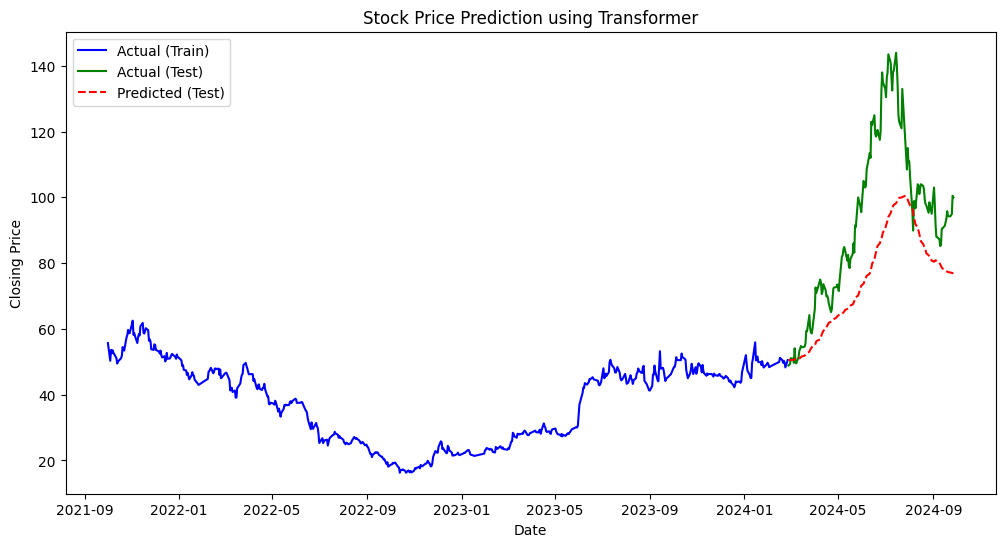

In [35]:


# 可視化
plt.figure(figsize=(12, 6))

# 實際數據
plt.plot(df['日期'][window_size:split_index + window_size], y_train_actual, color='blue', label='Actual (Train)')

# 調整日期範圍，確保日期長度與測試數據一致
test_dates = df['日期'][split_index + window_size:split_index + window_size + len(y_test_actual)]

# 實際測試數據
plt.plot(test_dates, y_test_actual, color='green', label='Actual (Test)')

# 預測數據
plt.plot(test_dates, predictions, color='red', linestyle='dashed', label='Predicted (Test)')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction using Transformer')
plt.legend()
plt.show()